In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

C:\tools\Anaconda3\envs\tf\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
def read_training_images(train_files, train_dir):
    """
    A method that reads the training image files in a given directory and returns the list of all images as numpy arrays
    """

    images=[]
    n=0
    for img_name in train_files.file_name:
        image_path = os.path.join(train_dir, img_name)
        img = cv2.imread(image_path)
        # img = np.expand_dims(cv2.resize(img, dsize=(COLS, ROWS), interpolation=cv2.INTER_CUBIC), axis=2)
        # .flatten()
        # print(n)
        # print(type(img))
        # print(img.shape)
        # cv2.imshow('image', img)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        img = img.astype('float32')
        images.append(img)
        n+=1
    print("Number of training images read = {}".format(n))

    return images

In [3]:
def read_testing_images(directory):
    """
    A method that reads the test image files in a given directory and returns the list of all images as numpy arrays
    """
    files = os.listdir(directory)

    images=[]
    m=0
    for fil in files:
        image_path = os.path.join(directory, fil)
        img = cv2.imread(image_path)
        # img = np.expand_dims(cv2.resize(img, dsize=(COLS, ROWS), interpolation=cv2.INTER_CUBIC), axis=2)
        img = img.astype('float32')
        images.append(img)
        m+=1
    print("Number of testing images read = {}".format(m))

    return images

In [50]:
def custom_model(layer1_size, layer2_size, layer3_size, dropout=0.4):
    
    # initialize the model from the keras library   
    custom_model = tf.keras.applications.VGG16(include_top=False,
                                         weights="imagenet",
                                         input_shape=(480, 640, 3),
                                         classes=5)
    
#     # Top Model Block
#     x = custom_model.output
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)
#     predictions = tf.keras.layers.Dense(5, activation='softmax')(x)

#     # add your top layer block to your base model
#     model = tf.keras.Model(custom_model.input, predictions)
    
    
    model = tf.keras.Sequential()
    
    # Freeze custom model layers
    custom_model.trainable = False    
    
    model.add(custom_model)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(layer1_size, activation='relu'))
#     model.add(tf.keras.layers.Dropout(dropout))
#     model.add(tf.keras.layers.Dense(layer2_size, activation='relu'))
#     model.add(tf.keras.layers.Dropout(dropout))
#     model.add(tf.keras.layers.Dense(layer3_size, activation='relu'))
#     model.add(tf.keras.layers.Dropout(dropout))
    # Add 'softmax' instead of earlier 'prediction' layer.
    model.add(tf.keras.layers.Dense(5, activation='softmax'))

    return model

In [35]:
def generate_plots(model_history, epochs):
    """
    A method that takes the model history of a trained model and plots its:
    1. Training accuracy
    2. Training loss
    3. Validation accuracy
    4. Validation loss
    """
    acc = model_history.history['acc']
    val_acc = model_history.history['val_acc']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']


    plt.figure(1)
    plt.suptitle('Accuracy learning curve', fontsize=20)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel('accuracy', fontsize=14)
    plt.plot(acc, label='training accuracy')
    plt.plot(val_acc, label='validation accuracy')
    plt.xticks(np.arange(0, epochs + epochs/10, epochs/10))
    plt.legend(loc="lower right")
    plt.savefig("accuracy.png", dpi=300)

    plt.figure(2)
    plt.suptitle('Loss learning curve', fontsize=20)
    plt.xlabel('epochs', fontsize=14)
    plt.ylabel('loss', fontsize=14)
    plt.plot(loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xticks(np.arange(0, epochs + epochs/10, epochs/10))
    plt.legend(loc="upper right")
    plt.savefig("loss.png", dpi=300)

In [25]:
def best_results(model_history):
    """
    A method that prints the best validation accuracy and loss to a best_results.txt file.
    """
    acc = model_history.history['acc']
    val_acc = model_history.history['val_acc']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    
    f = open("best_results.txt", "w+")
    f.write("Training accuracy = {}\n".format(acc))
    f.write("----------------------\n")
    f.write("Training loss = {}\n".format(loss))
    f.write("----------------------\n")
    f.write("Validation accuracy = {}\n".format(val_acc))
    f.write("----------------------\n")
    f.write("Validation loss = {}\n".format(val_loss))
    f.write("----------------------\n")
    f.write("----------------------\n\n")
    f.close()

In [26]:

# Initialize the directories
root_dir = os.path.abspath('./')
train_dir = os.path.join(root_dir, 'Training')
test_dir = os.path.join(root_dir, 'Project_C2_Testing')


train_files = pd.read_csv(os.path.join(root_dir, 'train_files.csv'))

# set constants
COLS, ROWS, CHANNEL = 480, 640, 3

# training constants
EPOCHS = 30
BATCH_SIZE = 16

# read the training and testing images
training_images = read_training_images(train_files, train_dir)
testing_images = read_testing_images(test_dir)


X_train = np.stack(training_images)
y_train = train_files.annotation.values
X_test = np.stack(testing_images)


# Split the training data in training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=None, shuffle=True, stratify=y_train)

print("Shape of training set: {}".format(X_train.shape))
print("Shape of validation set: {}".format(X_val.shape))
print("Shape of testing set: {}".format(X_test.shape))    

Number of training images read = 896
Number of testing images read = 129
Shape of training set: (716, 480, 640, 3)
Shape of validation set: (180, 480, 640, 3)
Shape of testing set: (129, 480, 640, 3)


In [51]:
print("-------------------")
print("Compiling model")
print("-------------------")

# initialize the model
model = custom_model(512, 512, 256, 0.4)

model.summary()

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

-------------------
Compiling model
-------------------
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 15, 20, 512)       14714688  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 2565      
Total params: 14,717,253
Trainable params: 2,565
Non-trainable params: 14,714,688
_________________________________________________________________


In [52]:
print("-------------------")
print("Training model")
print("-------------------")

with tf.device('/device:GPU:0'):
    history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val))

-------------------
Training model
-------------------
Train on 716 samples, validate on 180 samples
Epoch 1/30
716/716 [==============================] - 15s 21ms/sample - loss: 1.3837 - acc: 0.4763 - val_loss: 1.1242 - val_acc: 0.5778
Epoch 2/30
716/716 [==============================] - 11s 16ms/sample - loss: 1.0006 - acc: 0.6006 - val_loss: 0.9527 - val_acc: 0.6611
Epoch 3/30
716/716 [==============================] - 12s 16ms/sample - loss: 0.8627 - acc: 0.6592 - val_loss: 0.8679 - val_acc: 0.6889
Epoch 4/30
716/716 [==============================] - 12s 16ms/sample - loss: 0.7883 - acc: 0.7053 - val_loss: 0.8162 - val_acc: 0.7000
Epoch 5/30
716/716 [==============================] - 12s 16ms/sample - loss: 0.7100 - acc: 0.7263 - val_loss: 0.8266 - val_acc: 0.7056
Epoch 6/30
716/716 [==============================] - 12s 16ms/sample - loss: 0.6753 - acc: 0.7528 - val_loss: 0.7706 - val_acc: 0.6944
Epoch 7/30
716/716 [==============================] - 12s 16ms/sample - loss: 0.634

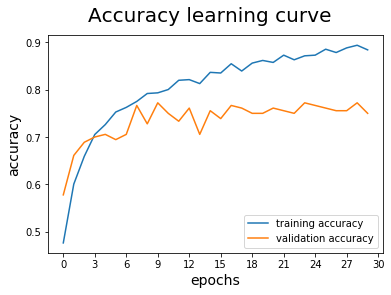

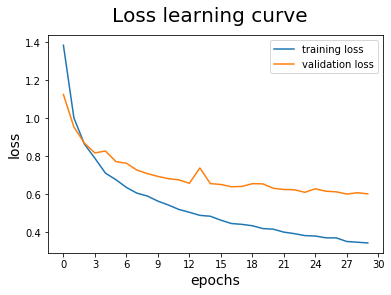

In [53]:
predictions = model.predict(X_test, batch_size=16)

generate_plots(history, EPOCHS)

best_results(history)

In [54]:
labels = [np.argmax(prediction) for prediction in predictions]

y_pred = tf.keras.utils.to_categorical(labels)
np.savetxt("./predictions.csv", y_pred, fmt="%d", delimiter=",")